## Explore tables and joins in a Jupyter Notebook in ArcPro
### Import the arcgis and pandas libraries

In [39]:
import arcgis
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Read in a map layer
### Read in the landover feature class in our ArcPro session as a *spatially enabled dataframe* (an arcgis class that makes our spatial data a [pandas](https://pandas.pydata.org/) data frame with a geometry list column (pandas is one of if not the most used data science libraries in Python) - this is just a spin on the very popular open source Python library [GeoPandas](https://geopandas.org/en/stable/)

In [33]:
landcover = pd.DataFrame.spatial.from_featureclass("landcover")

### We can simply type the object name to see a snapshot of rows and columns

In [29]:
landcover

,OBJECTID,ID,CLASS,ACRES,AREA,PERIMETER,SHAPE
0,1,10270,122,31.062,1353080.178,4652.879,"{""rings"": [[[335160.02273723483, 411988.213580..."
1,2,10271,102,21.267,926396.026,4388.659,"{""rings"": [[[336323.24246103317, 411988.213580..."
2,3,10585,101,612.523,26681509.247,31169.758,"{""rings"": [[[336323.24246103317, 410824.993772..."
3,4,10586,88,31.062,1353080.178,4652.879,"{""rings"": [[[342139.3411639333, 408498.5543251..."
4,5,10587,122,9.739,424244.535,3087.116,"{""rings"": [[[342639.7637258023, 408498.5543251..."
...,...,...,...,...,...,...,...
1342,1343,23008,101,160.612,6996256.674,14431.025,"{""rings"": [[[388668.1310389787, 250300.6687835..."
1343,1344,23313,149,14.15,616385.065,3577.174,"{""rings"": [[[385178.47178366035, 245647.789804..."
1344,1345,23510,111,532.349,23189107.95,37402.527,"{""rings"": [[[391241.27305749804, 246093.959867..."
1345,1346,24182,101,237.25,10334618.323,21904.084,"{""rings"": [[[390331.19117648154, 245037.863462..."


### Using the info method lets us see the data types of fields, *just like fields view for a table in ArcPro*

In [30]:
landcover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   1347 non-null   Int64   
 1   ID         1347 non-null   Int64   
 2   CLASS      1347 non-null   Int32   
 3   ACRES      1347 non-null   Float64 
 4   AREA       1347 non-null   Float64 
 5   PERIMETER  1347 non-null   Float64 
 6   SHAPE      1347 non-null   geometry
dtypes: Float64(3), Int32(1), Int64(2), geometry(1)
memory usage: 76.4 KB


### Are all values for 'CLASS' in landcover unique (or to say another way, are there any duplicates?)

In [13]:
landcover["CLASS"].is_unique      # False
landcover['CLASS'].duplicated().any() # True

False

### How about in the vegetation type table?

In [22]:
veg = pd.DataFrame.spatial.from_table("veg_type")
veg.head()

,OBJECTID,CLASS,COV_CLASS,LANDCOVER,VEG_TYPE
0,1,2,Cropland,CROPLAND/GRASSLAND,"SORGHUM, SMALL GRAINS, BLUESTEM, WHEATGRASS"
1,2,3,Cropland,CROPLAND,SPRING WHEAT
2,3,6,Cropland,CROPLAND,"MIXED DRYLAND (SORGHUM, SMALL GRAINS)"
3,4,8,Cropland,CROPLAND,"MIXED CROPS (WHEAT WITH CORN, SUNFLOWERS)"
4,5,10,Cropland,CROPLAND/WOODLAND,"SMALL GRAINS, BIG SAGE, WHEATGRASS, PONDEROSA"


In [24]:
# not veg["CLASS"].is_unique      # False - it is unique
veg['CLASS'].duplicated().any() # False - it is not duplicated - it's unique

False

### We can perform the same join we did in ArcPro exercise here with landcover and vegetation type on our primary key of 'CLASS'
### We'll drop'OBJECTID' from the vegetation table.

In [35]:
veg.drop(['OBJECTID'], axis=1,inplace=True)
landcover = pd.merge(landcover, veg, how="left", on="CLASS")

### We can list our columns and see if we merged our tables

In [36]:
landcover.columns

Index(['OBJECTID', 'ID', 'CLASS', 'ACRES', 'AREA', 'PERIMETER', 'SHAPE',
       'COV_CLASS', 'LANDCOVER', 'VEG_TYPE'],
      dtype='object')

### And we can make a simple chart to visualize our joined data

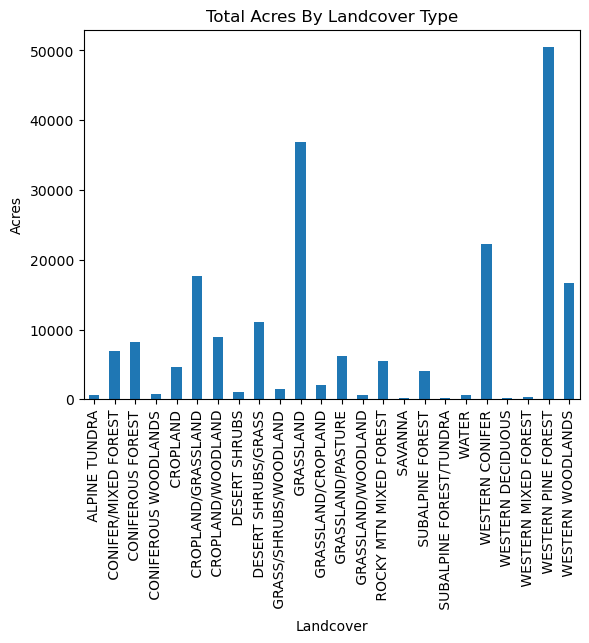

In [44]:
landcover_groups = landcover.groupby(['LANDCOVER'])['ACRES'].sum()
landcover_groups.plot(kind='bar', title='Total Acres By Landcover Type',
               ylabel='Acres', xlabel='Landcover')
plt.show()